<a href="https://colab.research.google.com/github/kyjness/10th_Seminar/blob/week03/2%E1%84%8C%E1%85%AE%E1%84%8E%E1%85%A1_%E1%84%92%E1%85%AC%E1%84%80%E1%85%B1%2C_%E1%84%87%E1%85%AE%E1%86%AB%E1%84%85%E1%85%B2_%E1%84%80%E1%85%AA%E1%84%8C%E1%85%A6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


df = pd.read_csv('/content/drive/MyDrive/쿠글/데이터/advertising.csv')
df.head(5)

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


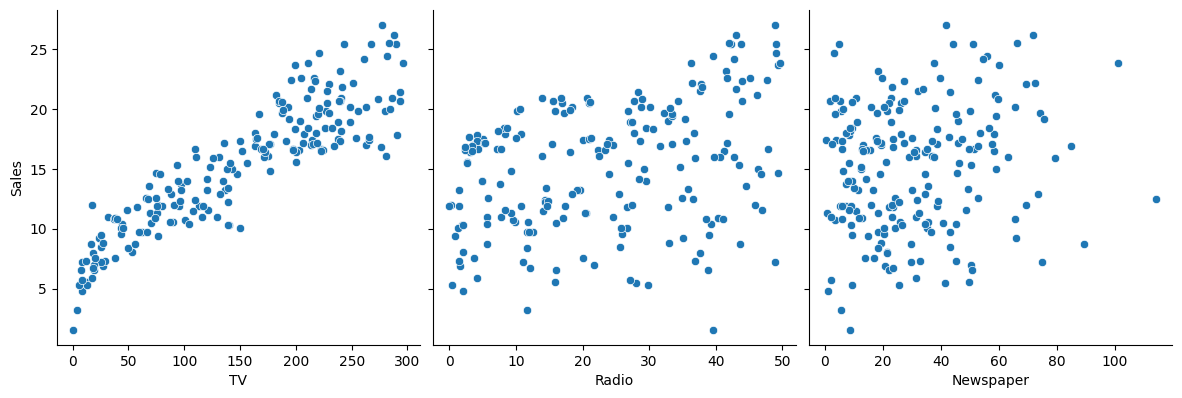

In [4]:
sns.pairplot(df, x_vars=['TV', 'Radio', 'Newspaper'], y_vars=['Sales'], height=4)   # 컬럼명 넣기

In [5]:
x_data = np.array(df[['TV']], dtype=np.float32)   # 컬럼명 넣기
y_data = np.array(df['Sales'], dtype=np.float32)     # 컬럼명 넣기

print(x_data.shape)
print(y_data.shape)

x_data = x_data.reshape((-1, 1))
y_data = y_data.reshape((-1, 1))

print(x_data.shape)
print(y_data.shape)

(200, 1)
(200,)
(200, 1)
(200, 1)


In [6]:
x_train, x_val, y_train, y_val = train_test_split(x_data, y_data, test_size=0.2, random_state=6)

model=LinearRegression()

model.fit(x_train,y_train)

LinearRegression()

In [7]:
model.score(x_train, y_train) # 훈련세트 점수 확인

0.815243124961853

In [8]:
model.score(x_val,y_val) # 검증세트 점수 확인

0.795045793056488

#### <과제1>

#### (1) 빈칸을 채워주세요
#### (2) 훈련 세트의 점수와 검증 세트의 점수는 각각 얼마인지 써주세요
####     답 : 훈련세트 점수: 0.815243124961853/ 검증세트 점수: 0.795045793056488
#### (3) 이 모델이 과대적합인지 과소적합인지, 또는 잘 훈련되었는지 판단하시고 그 이유를 말씀해주세요
####     답 : 훈련세트 점수가 검증세트 점수보다 높기는 하나 두 점수 다 낮은 축에 속하기 때문에 과소적합이다.

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder , StandardScaler
import numpy as np
import pandas as pd

In [11]:
# 데이터셋을 불러옵니다.
data=pd.read_csv("/content/drive/MyDrive/쿠글/데이터/Obesity Classification.csv")
data.head()

,ID,Age,Gender,Height,Weight,BMI,Label
0,1,25,Male,175,80,25.3,Normal Weight
1,2,30,Female,160,60,22.5,Normal Weight
2,3,35,Male,180,90,27.3,Overweight
3,4,40,Female,150,50,20.0,Underweight
4,5,45,Male,190,100,31.2,Obese


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      108 non-null    int64  
 1   Age     108 non-null    int64  
 2   Gender  108 non-null    object 
 3   Height  108 non-null    int64  
 4   Weight  108 non-null    int64  
 5   BMI     108 non-null    float64
 6   Label   108 non-null    object 
dtypes: float64(1), int64(4), object(2)
memory usage: 6.0+ KB


In [13]:
# 범주형 열(Label과 Gender)을 LabelEncoder를 사용해 인코딩합니다.
label_encoder=LabelEncoder()
data['target']=label_encoder.fit_transform(data['Label'])
data['gender']=label_encoder.fit_transform(data['Gender'])
data.head()

,ID,Age,Gender,Height,Weight,BMI,Label,target,gender
0,1,25,Male,175,80,25.3,Normal Weight,0,1
1,2,30,Female,160,60,22.5,Normal Weight,0,0
2,3,35,Male,180,90,27.3,Overweight,2,1
3,4,40,Female,150,50,20.0,Underweight,3,0
4,5,45,Male,190,100,31.2,Obese,1,1


In [14]:
# 'Gender', 'Label', 'ID' 열을 데이터셋에서 제거합니다.
#'Gender'와 'Label'은 인코딩되었고, 'ID'는 모델링에 관련이 없을 가능성이 높음
if "Gender" in data.columns:
    df=data.drop(["Gender","Label","ID"],axis=1)
df.head()

,Age,Height,Weight,BMI,target,gender
0,25,175,80,25.3,0,1
1,30,160,60,22.5,0,0
2,35,180,90,27.3,2,1
3,40,150,50,20.0,3,0
4,45,190,100,31.2,1,1


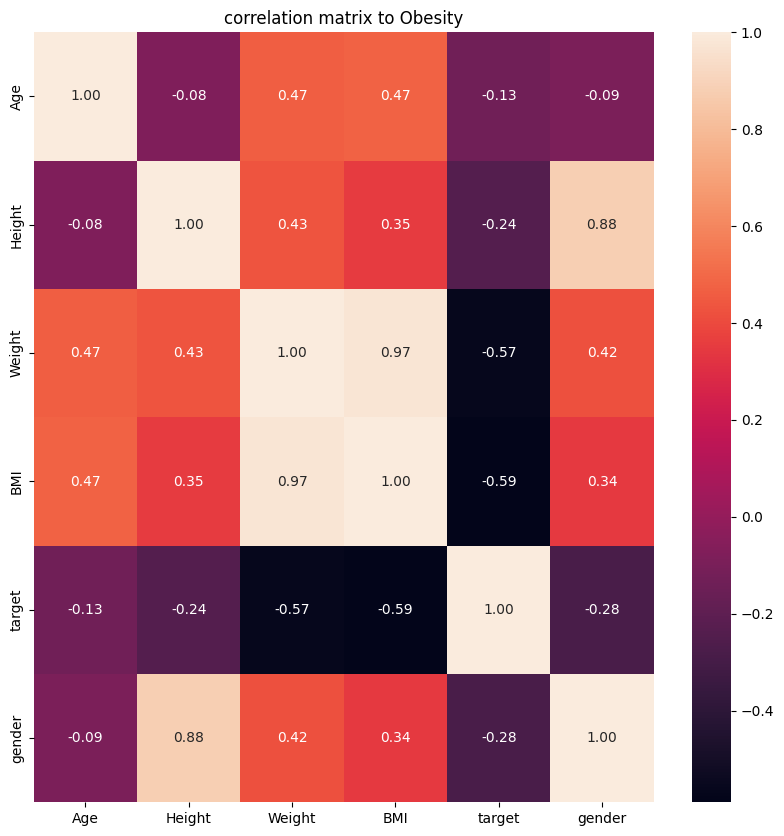

In [15]:
# 데이터셋의 상관관계 행렬을 계산합니다.
corrmatrix=df.corr()

# 상관관계 행렬을 시각화합니다.
plt.figure(figsize=(10,10))
sns.heatmap(corrmatrix,annot=True,fmt="0.2f",color="Red")
plt.title("correlation matrix to Obesity")
plt.show()

In [16]:
# 'target' 열을 제외한 나머지 변수들을 x에 저장합니다.
x=df.drop("target",axis=1)
# 'target' 열을 y에 저장합니다.
y=df['target']

In [17]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2, random_state=6)

# Decision Tree 모델을 초기화하고 학습합니다.
model1=DecisionTreeClassifier()
model1.fit(x_train,y_train)

DecisionTreeClassifier()

In [18]:
# 학습 데이터에 대한 모델의 정확도를 확인합니다.
model1.score(x_train,y_train)

1.0

In [19]:
# 테스트 데이터에 대한 모델의 정확도를 확인합니다.
model1.score(x_test,y_test)

0.9545454545454546

In [20]:
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.2, random_state=6)

model2=LogisticRegression()
model2.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [21]:
model2.score(x_train,y_train)

0.8255813953488372

In [22]:
model2.score(x_test,y_test)

0.7727272727272727

#### 과제2
#### (1) 빈칸을 채워주세요
#### (2) 분류 모델의 과적합을 방지하는 방법에는 뭐가있는지 찾아보세요

1.데이터 관련 방법:

-더 많은 데이터 수집: 더 많은 데이터를 사용하면 모델이 패턴을 더 일반화하는 데 도움이 됩니다.
-데이터 증강(Data Augmentation): 이미지나 텍스트 데이터의 경우 데이터를 변형하거나 노이즈를 추가하여 학습 데이터를 늘리는 방법입니다.

2.정규화(Regularization):

-L1/L2 정규화: 손실 함수에 패널티를 추가하여 모델의 가중치가 너무 커지는 것을 방지합니다. L1 정규화는 가중치의 절댓값을 패널티로 부과하고, L2 정규화는 가중치의 제곱을 패널티로 부과합니다.
-드롭아웃(Dropout): 신경망의 일부 노드를 학습 단계에서 무작위로 제거하여 특정한 노드에 지나치게 의존하지 않도록 합니다. 드롭아웃 비율은 일반적으로 0.2~0.5 사이로 설정합니다.

3.모델 구조 간소화:

-모델의 복잡도 줄이기: 너무 많은 파라미터(층, 노드 수)를 가진 모델은 과적합에 취약합니다. 층의 수나 노드의 수를 줄이는 것이 도움이 될 수 있습니다.
-앙상블 방법 사용: 랜덤 포레스트나 그래디언트 부스팅과 같은 앙상블 모델은 개별 모델의 과적합을 방지하는 데 효과적입니다.

4.조기 종료(Early Stopping):

-학습 도중 검증 데이터에 대한 성능이 더 이상 개선되지 않을 때 학습을 멈추는 방법입니다. 이는 과적합을 방지하기 위한 효과적인 방법입니다.

5.교차 검증(Cross-Validation):

-K-겹 교차 검증(K-fold cross-validation)을 통해 모델이 여러 데이터 세트에서 테스트되도록 하면 과적합을 방지하고 일반화 성능을 평가하는 데 도움이 됩니다.

6.배깅(Bagging) 및 부스팅(Boosting):

-배깅(Bagging): 다수의 모델을 독립적으로 학습시키고 결과를 결합하여 과적합을 방지하는 방법입니다. 랜덤 포레스트가 대표적인 배깅 알고리즘입니다.
-부스팅(Boosting): 여러 모델을 순차적으로 학습시키며 이전 모델이 만든 오류를 개선하는 방식입니다. 그래디언트 부스팅 머신(GBM), XGBoost, LightGBM 등이 있습니다.

7.피처 선택 및 축소:

-차원 축소(Dimensionality Reduction): PCA(주성분 분석)나 t-SNE 등의 차원 축소 기법을 사용하여 모델의 복잡성을 줄일 수 있습니다.
-피처 선택(Feature Selection): 모델 학습에 꼭 필요한 피처만 선택하여 과적합을 줄이는 방법입니다.